In [9]:
library(ggplot2)
library(tm)
library(textstem)

#  Searching for Data Analyst Heaven

## Abstract

#### The main objective of the project is to find the place that provides the best opportunities for junior data analysts, and more experienced data analysts, as well. By developing a better understanding of the data analyst work and job specifications I decided to present some crucial information regarding the main topic. For this purpose a dataset from kaggle was used, with data analyst job listings scraped from glassdoor. A thorough analysis of the distribution of wages by job title, by location and leading sectors was conducted. 31 of the most frequent words used in data analyst job descriptions were also identified. 

### Introduction

Throughout the duration of the Data Science course the question of describing the Data Science application process and what qualifications one might need in order to apply to the most attractive place for starting a carreer in data analysis. So I decided to do some research using the methods we have learned on the course.
After a quick search on Kaggle, I found a dataset with 2253 Data Analyst job listings ([kaggle.com/andrewmvd/data-analyst-jobs](https://www.kaggle.com/andrewmvd/data-analyst-jobs)) and started researching the topic. 

After the dataset was downloaded let's set the working directory and read the dataset:

In [10]:
setwd("D:/Саня/Проекты/R/SoftUni/Экзамен")

In [11]:
data.analyst.job <- read.csv("DataAnalyst.csv")

Let's see if the dataset was read correctly and familiarise with it a bit.

In [12]:
names(data.analyst.job)

[1] "X"                 "Job.Title"         "Salary.Estimate"  
 [4] "Job.Description"   "Rating"            "Company.Name"     
 [7] "Location"          "Headquarters"      "Size"             
[10] "Founded"           "Type.of.ownership" "Industry"         
[13] "Sector"            "Revenue"           "Competitors"      
[16] "Easy.Apply"

In [13]:
str(data.analyst.job)

'data.frame':	2253 obs. of  16 variables:
 $ X                : int  0 1 2 3 4 5 6 7 8 9 ...
 $ Job.Title        : Factor w/ 1272 levels "#104252 Division Data and Financial Analyst",..: 431 904 1029 225 922 225 164 573 225 440 ...
 $ Salary.Estimate  : Factor w/ 90 levels "-1","$110K-$190K (Glassdoor est.)",..: 19 19 19 19 19 19 19 19 19 19 ...
 $ Job.Description  : Factor w/ 2253 levels "--- This is a 3-6 month full-time internship opening ---\n\nDo you love data?\n\nAre you passionate about drivi"| __truncated__,..: 175 1413 2198 1668 66 62 2095 490 1929 116 ...
 $ Rating           : num  3.2 3.8 3.4 4.1 3.9 3.9 4.4 3.7 4 4.4 ...
 $ Company.Name     : Factor w/ 1514 levels "","1","1199SEIU Funds\n3.2",..: 1425 1448 1210 239 483 1007 1370 556 395 1089 ...
 $ Location         : Factor w/ 253 levels "Addison, TX",..: 155 155 155 155 155 155 155 155 155 155 ...
 $ Headquarters     : Factor w/ 483 levels "-1","Abbott Park, IL",..: 293 293 293 250 293 414 293 293 235 293 ...
 $ Size      

We can see that some of these variables are not needed, because they contain information important for glassdoor users only like "Rating", "Headquarters" etc., so we can free up some memory.

In [14]:
data.analyst.job <- data.analyst.job[, -(c(5, 8, 9, 11, 14, 15, 16))]

## Q1 How salary varies in relation to job title
People say that salary is not important - you cannot trust them. Yes, there are many factors which one needs to take into account when deciding where to apply, and salary is not always on top of the list, but not in our heaven. 
In order to answer our question, first we need to tidy up the data. We can see that "Job Title" is a factor with 1272 levels, but we know that all positions are related with data analytics.

In [15]:
summary(data.analyst.job$Job.Title)

Data Analyst 
                                                                                          405 
                                                                          Senior Data Analyst 
                                                                                           90 
                                                                          Junior Data Analyst 
                                                                                           30 
                                                                        Business Data Analyst 
                                                                                           28 
                                                                             Sr. Data Analyst 
                                                                                           21 
                                                                              Data Analyst II 
                                                                                           17 
                                                                          Data Analyst Junior 
                                                                                           17 
                                                                         Data Quality Analyst 
                                                                                           17 
                                                                      Data Governance Analyst 
                                                                                           16 
                                                                            Lead Data Analyst 
                                                                                           15 
                                                                       Data Reporting Analyst 
                                                                                           13 
                                                                       Financial Data Analyst 
                                                                                           12 
                                                                               Data Analyst I 
                                                                                           11 
                                                                             Data Analyst III 
                                                                                           11 
                                                                       Marketing Data Analyst 
                                                                                            9 
                                                                              Sr Data Analyst 
                                                                                            9 
                                                                      Data Management Analyst 
                                                                                            8 
                                                                       Data Warehouse Analyst 
                                                                                            8 
                                                                         Data Science Analyst 
                                                                                            7 
                                                                             SQL Data Analyst 
                                                                                            7 
                                                                       Technical Data Analyst 
                                                                                            7 
                                                                        Clinical Data Analy

We have a lot of different "Data analyst" names, in some cases "case sensitivity" plays the only difference. We need to reduce them to an acceptable amount. For deeper analysis we can use regexp to find all cases.

In [16]:
length(grep("[Da]ata [Aa]nalyst", data.analyst.job$Job.Title))

[1] 1648

In [17]:
length(grep("[Dd]ata [Ss]cientist", data.analyst.job$Job.Title))

[1] 14

We have 14 Job Titles which contain [Dd]ata [Ss]cientist in the name, you can view them down below.

In [18]:
data.science.regexp <- regexpr("(.*)[Dd]ata [Ss]cientist(.*)", data.analyst.job$Job.Title)
regmatches(data.analyst.job$Job.Title, data.science.regexp)

[1] "Data Scientist / Big Data Analytics Analyst"                                                    
 [2] "Buyside - Data Scientist/Research Analyst"                                                      
 [3] "Sr. Principal Metrics Analyst- Data Scientist"                                                  
 [4] "Data Scientist/Analyst - Noke"                                                                  
 [5] "Data Scientist - Sr. Analyst"                                                                   
 [6] "Data Scientist Sr. - Conversation Designer & NLP Analyst"                                       
 [7] "IGNITE Graduate Development Program - Application Developer / Data Scientist / Business Analyst"
 [8] "IGNITE Graduate Development Program Application Developer / Data Scientist / Business Analyst"  
 [9] "Sr. Data Scientist/Analyst"                                                                     
[10] "Operations Research Analyst (Data Scientist)"                                                   
[11] "Business Analyst / Data Scientist Manager"                                                      
[12] "Data Scientist/Programmer, Sr. Analyst - Abbott Nutrition - Columbus, OH"                       
[13] "Data Scientist/Analyst - Wilbur Labs"                                                           
[14] "Data Scientist Analyst"

Most of them have the word "analyst", so we do not need to create a "Data Scientist" level.

In [19]:
length(grep("[Ss]enior", data.analyst.job$Job.Title))

[1] 282

In [20]:
length(grep("[Jj]unior", data.analyst.job$Job.Title))

[1] 60

In [21]:
length(grep("[Ss]r", data.analyst.job$Job.Title))

[1] 129

In [22]:
length(grep("[Jj]n", data.analyst.job$Job.Title))

[1] 0

A large number of the positions contain "Data Analyst" in their job title, after that we see "Senior Data analyst" and "Junior Data analyst", let's recode the "Job Title" on these three levels.

In [23]:
#First, we need to recode Job Title to a numeric value
#1 Data Analyst
#2 Junior Data Analyst
#3 Senior Data analyst

# The easiest way to do that is to change the type of job title to a character and after that to recode it back into a factor
data.analyst.job$Job.Title <- as.character(data.analyst.job$Job.Title)
data.analyst.job$Job.Title[grep("[Jj]unior", data.analyst.job$Job.Title)] <- 2
data.analyst.job$Job.Title[grep("[Ii]ntern", data.analyst.job$Job.Title)] <- 2
data.analyst.job$Job.Title[grep("[Ss]enior", data.analyst.job$Job.Title)] <- 3
data.analyst.job$Job.Title[grep("[Ss]r", data.analyst.job$Job.Title)] <- 3
data.analyst.job$Job.Title[grep("[A-z]", data.analyst.job$Job.Title)] <- 1

In [24]:
# Let's see if we changed all titles
subset(data.analyst.job, Job.Title != "1" & Job.Title != "2" & Job.Title != "3")$Job.Title

character(0)

In [27]:
data.analyst.job$Job.Title[data.analyst.job$Job.Title == "1"] <- "Data Analyst"
data.analyst.job$Job.Title[data.analyst.job$Job.Title == "2"] <- "Junior Data Analyst"
data.analyst.job$Job.Title[data.analyst.job$Job.Title == "3"] <- "Senior Data Analyst"

data.analyst.job$Job.Title <- as.factor(data.analyst.job$Job.Title)
levels(data.analyst.job$Job.Title)

[1] "Junior Data Analyst" "Data Analyst"        "Senior Data Analyst"

In [28]:
# The levels are not sorted ascendingly
data.analyst.job$Job.Title <- factor(data.analyst.job$Job.Title, 
                                        levels = c("Junior Data Analyst", "Data Analyst", "Senior Data Analyst"))
levels(data.analyst.job$Job.Title)

[1] "Junior Data Analyst" "Data Analyst"        "Senior Data Analyst"

OK, we're done with job titles. We could see, that "Salary Estimate" is a factor too and contains 90 levels. Let's see how we can simplify it.

In [29]:
summary(data.analyst.job$Salary.Estimate)

-1 $110K-$190K (Glassdoor est.) 
                           1                           29 
$113K-$132K (Glassdoor est.)   $24K-$48K (Glassdoor est.) 
                          29                           29 
  $26K-$47K (Glassdoor est.)   $27K-$52K (Glassdoor est.) 
                          29                           30 
  $28K-$52K (Glassdoor est.)   $29K-$38K (Glassdoor est.) 
                          28                           29 
  $30K-$53K (Glassdoor est.)   $30K-$54K (Glassdoor est.) 
                          30                            8 
  $31K-$59K (Glassdoor est.)   $32K-$56K (Glassdoor est.) 
                           4                            4 
  $34K-$61K (Glassdoor est.)   $35K-$42K (Glassdoor est.) 
                          28                           30 
  $35K-$45K (Glassdoor est.)   $35K-$67K (Glassdoor est.) 
                          28                           33 
  $36K-$67K (Glassdoor est.)   $37K-$44K (Glassdoor est.) 
                           3                           29 
  $37K-$66K (Glassdoor est.)   $37K-$68K (Glassdoor est.) 
                          30                           30 
  $37K-$70K (Glassdoor est.)   $38K-$68K (Glassdoor est.) 
                          29                           29 
  $40K-$72K (Glassdoor est.)   $40K-$74K (Glassdoor est.) 
                          19                            9 
  $41K-$78K (Glassdoor est.)   $41K-$86K (Glassdoor est.) 
                          57                           29 
  $42K-$63K (Glassdoor est.)   $42K-$66K (Glassdoor est.) 
                           4                           30 
  $42K-$74K (Glassdoor est.)   $42K-$76K (Glassdoor est.) 
                          27                           57 
  $43K-$69K (Glassdoor est.)   $43K-$76K (Glassdoor est.) 
                          30                           31 
  $43K-$77K (Glassdoor est.)   $43K-$94K (Glassdoor est.) 
                           3                           29 
  $44K-$78K (Glassdoor est.)   $44K-$82K (Glassdoor est.) 
                          12                           28 
  $45K-$78K (Glassdoor est.)   $45K-$88K (Glassdoor est.) 
                          11                           11 
 $46K-$102K (Glassdoor est.)   $46K-$86K (Glassdoor est.) 
                          28                           30 
  $46K-$87K (Glassdoor est.)   $47K-$74K (Glassdoor est.) 
                          30                           26 
  $47K-$76K (Glassdoor est.)   $47K-$81K (Glassdoor est.) 
                          28                            3 
  $48K-$88K (Glassdoor est.)   $48K-$96K (Glassdoor est.) 
                          27                           22 
 $49K-$112K (Glassdoor est.)   $49K-$91K (Glassdoor est.) 
                          18                           28 
  $50K-$86K (Glassdoor est.)   $50K-$93K (Glassdoor est.) 
                          41                           19 
  $51K-$87K (Glassdoor est.)   $51K-$88K (Glassdoor est.) 
                          30                           30 
  $51K-$93K (Glassdoor est.)  $53K-$104K (Glassdoor est.) 
                          29                           26 
  $53K-$94K (Glassdoor est.)   $53K-$99K (Glassdoor est.) 
                          29                           26 
  $54K-$75K (Glassdoor est.)  $55K-$101K (Glassdoor est.) 
                          28                           27 
 $55K-$103K (Glassdoor est.)  $57K-$100K (Glassdoor est.) 
                          29                           27 
 $57K-$103K (Glassdoor est.)  $57K-$104K (Glassdoor est.) 
                          29                           27 
  $57K-$67K (Glassdoor est.)   $57K-$70K (Glassdoor est.) 
                          26                            2 
  $58K-$93K (Glassdoor est.)   $59K-$85K (Glassdoor est.) 
                          31                           30 
 $60K-$110K (Glassdoor est.)  $60K-$124K (Glassdoor est.) 
                          30                           31 
  $60K-$66K (G

We can see that most of the levels of the "salary estimate" have a very big range. For our objective we don't require all of them so we can reduce them to 3 factors - "Less than 50K per year", "Between 50K and 100K per year" and "Higher than 100K per year". For this task we will estimate the mean of every level and after that recode it into one of the three levels.

In [30]:
data.analyst.job$Salary.Estimate[data.analyst.job$Salary.Estimate == -1] <- NA

start.salary <- sub("K-(.*) [(]Glassdoor est.[)]", "",  data.analyst.job$Salary.Estimate)
start.salary <- sub("[$]", "", start.salary)

maximum.salary <- sub("K [(]Glassdoor est.[)]", "",  data.analyst.job$Salary.Estimate)
maximum.salary <- sub("[$](.*)[K][-][$]", "", maximum.salary)

start.salary <- as.numeric(start.salary)
maximum.salary <- as.numeric(maximum.salary)

salary <- (start.salary + maximum.salary)/2

data.analyst.job$Salary.Estimate <- salary

data.analyst.job$Salary.Estimate[data.analyst.job$Salary.Estimate < 50] <- 1
data.analyst.job$Salary.Estimate[data.analyst.job$Salary.Estimate >= 50 & data.analyst.job$Salary.Estimate < 100] <- 2
data.analyst.job$Salary.Estimate[data.analyst.job$Salary.Estimate >= 100] <- 3

data.analyst.job$Salary.Estimate <- as.factor(data.analyst.job$Salary.Estimate)

levels(data.analyst.job$Salary.Estimate) <- list("<50K" = 1, ">=50K <100K" = 2, ">=100K" = 3)

summary(data.analyst.job$Salary.Estimate)

<50K >=50K <100K      >=100K        NA's 
        306        1704         242           1

Now we can observe the salary spread in relation to job title:

In [31]:
summary(data.analyst.job$Salary.Estimate[data.analyst.job$Job.Title == "Junior Data Analyst"])
summary(data.analyst.job$Salary.Estimate[data.analyst.job$Job.Title == "Data Analyst"])
summary(data.analyst.job$Salary.Estimate[data.analyst.job$Job.Title == "Senior Data Analyst"])

<50K >=50K <100K      >=100K 
         17          49           5

<50K >=50K <100K      >=100K        NA's 
        248        1341         182           1

<50K >=50K <100K      >=100K 
         41         314          55

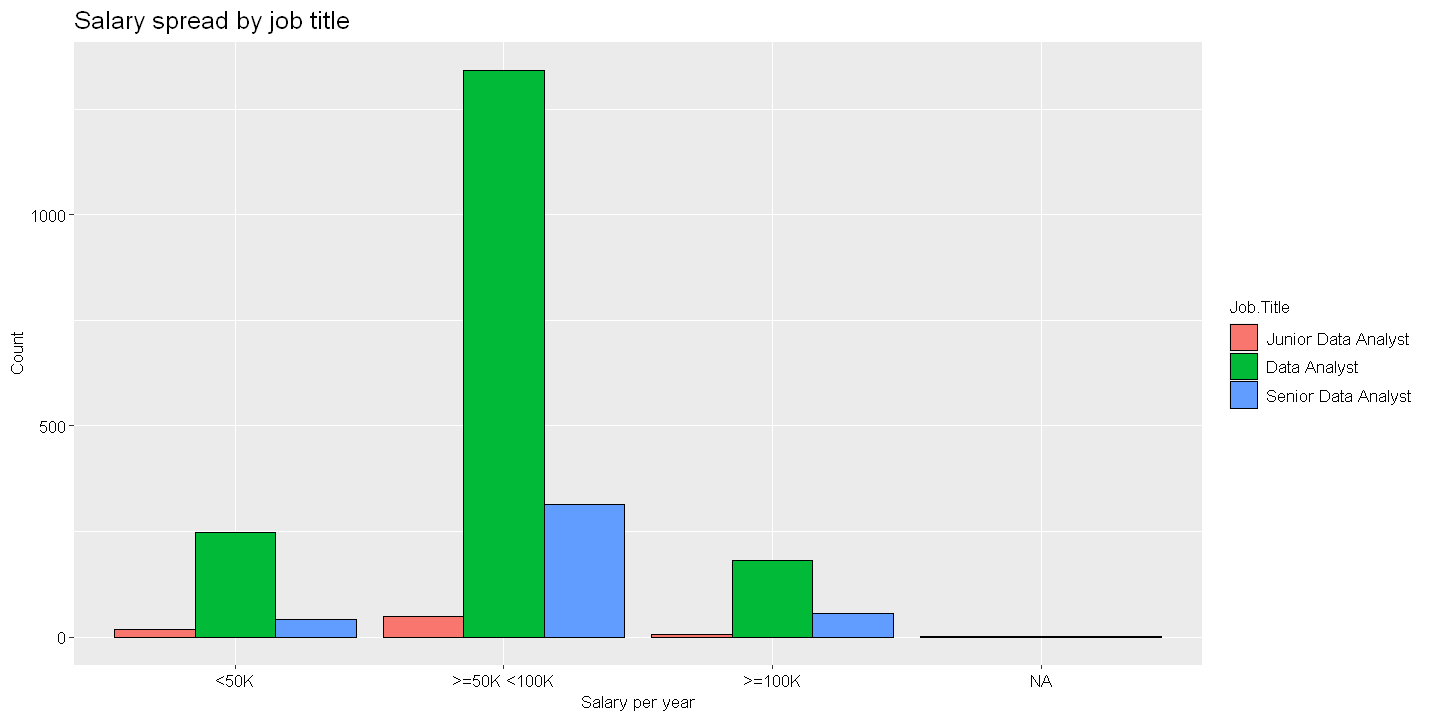

In [37]:
ggplot(data = data.analyst.job, aes(x = Salary.Estimate, fill=Job.Title)) +
  geom_bar( color = "black", position = position_dodge())+
  theme(axis.title.x=element_text(colour = 'black', size = 10),
        axis.title.y=element_text(colour = 'black', size = 10),
        axis.text.x=element_text(colour = 'black', size = 10),
        axis.text.y=element_text(colour = 'black', size = 10),
        legend.title=element_text(colour = 'black', size = 10),
        legend.text=element_text(colour = 'black', size = 10),
        plot.title = element_text(colour = 'black', size = 15) )+
  xlab("Salary per year") +
  ylab("Count")+
  ggtitle("Salary spread by job title")

## Q1 Conclusion

We can see that most of the salary offers fall in the bracket "between 50K and 100K per year". An interesting observation is that the number of data analysts earning more than 100K is greater than the number of senior data analysts with the same salary. The number of data analysts is also greater than the number of juniors in the "Less than 50K per year" bracket. Perhaps this is due to the fact that most companies don't type in the job titles, in the actual offers, or they only recognise formal differences between titles. Yes, maybe we should range titles by years of experience as far as qualification is concerned, but we can't be sure that a candidate will sign a senior or a junior contract.  

## Q2 How salary varies in relation to location

Everyone wants a piece of heaven. Where is the data analysts' heaven? Let's start looking...

In [38]:
summary(data.analyst.job$Location)

New York, NY                     Chicago, IL 
                            310                             130 
              San Francisco, CA                      Austin, TX 
                            119                              81 
                Los Angeles, CA                   Charlotte, NC 
                             80                              78 
                    Houston, TX                      Dallas, TX 
                             72                              66 
                  San Diego, CA                Philadelphia, PA 
                             62                              56 
                     Denver, CO                 San Antonio, TX 
                             47                              45 
                   San Jose, CA                     Phoenix, AZ 
                             38                              35 
                Jersey City, NJ                       Tempe, AZ 
                             33                              31 
                    Seattle, WA                    Columbus, OH 
                             30                              29 
                     Irving, TX                       Plano, TX 
                             29                              28 
             Salt Lake City, UT                 Santa Clara, CA 
                             22                              22 
                 El Segundo, CA                Jacksonville, FL 
                             19                              19 
                    Norfolk, VA                   San Mateo, CA 
                             18                              18 
                    Burbank, CA                Indianapolis, IN 
                             17                              17 
                 Fort Worth, TX                   Sunnyvale, CA 
                             16                              16 
              Mountain View, CA                  Scottsdale, AZ 
                             15                              15 
                  Palo Alto, CA                    Brooklyn, NY 
                             14                              13 
                  Cupertino, CA                     Hampton, VA 
                             13                              13 
                 Long Beach, CA                Redwood City, CA 
                             13                              12 
                 Menlo Park, CA                     Oakland, CA 
                             11                              11 
                    Redmond, WA                  Wilmington, DE 
                             11                              11 
                 Richardson, TX                  Centennial, CO 
                             10                               9 
              Downers Grove, IL                 Foster City, CA 
                              9                               9 
               Lake Success, NY                Santa Monica, CA 
                              9                               9 
                  Arlington, TX                    Glendale, CA 
                              8                               8 
Greenwood Village, Arapahoe, CO                     Horsham, PA 
                              8                               8 
                     Newark, NJ                    Chandler, AZ 
                              8                               7 
                  Englewood, CO                 Gainesville, FL 
                              7                               7 
            King of Prussia, PA                 Mooresville, NC 
                              7                               7 
                   Pasadena, CA                  Portsmouth, VA 
                              7                               7 
                    Anaheim, CA                  Broomfield, CO 
                              6                       

The amount of listings is very uneven. Let's take the top 10 locations into considiration for better visualisation.

In [39]:
# Top 10 places with the biggest amount of listings
top10.locations <- subset(data.analyst.job, Location == "New York, NY" |
                              Location == "Chicago, IL" |
                              Location == "San Francisco, CA" |
                              Location == "Austin, TX"|
                                Location == "Los Angeles, CA"| 
                                Location == "Charlotte, NC"|
                                Location == "Houston, TX" |
                                Location == "Dallas, TX" |
                                Location == "San Diego, CA"|
                                Location == "Philadelphia, PA")

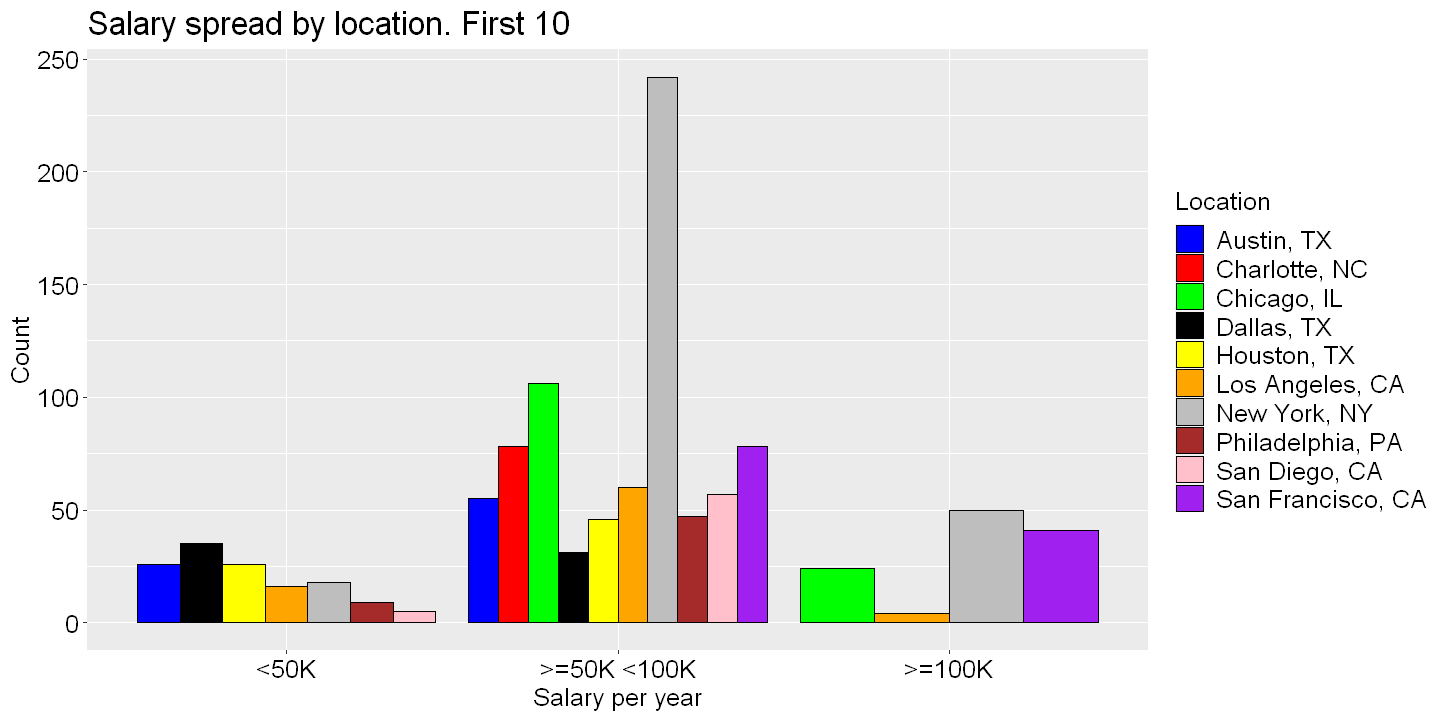

In [44]:
ggplot(data = top10.locations, aes(x = Salary.Estimate, fill = Location)) +
  geom_bar(color = "black", position = position_dodge()) +
  scale_fill_manual(values = c("blue", "red", "green", "black", "yellow", "orange", 
                             "grey", "brown", "pink", "purple"))+
  theme(axis.title.x = element_text(colour = 'black', size = 15),
        axis.title.y = element_text(colour = 'black', size = 15),
        axis.text.x = element_text(colour = 'black', size = 15),
        axis.text.y = element_text(colour = 'black', size = 15),
        legend.title = element_text(colour = 'black', size = 15),
        legend.text = element_text(colour = 'black', size = 15),
        plot.title = element_text(colour = 'black', size = 20) )+
  xlab("Salary per year") +
  ylab("Count")+
  ggtitle("Salary spread by location. First 10")

We can see the number of the varying job titles depending on the location:

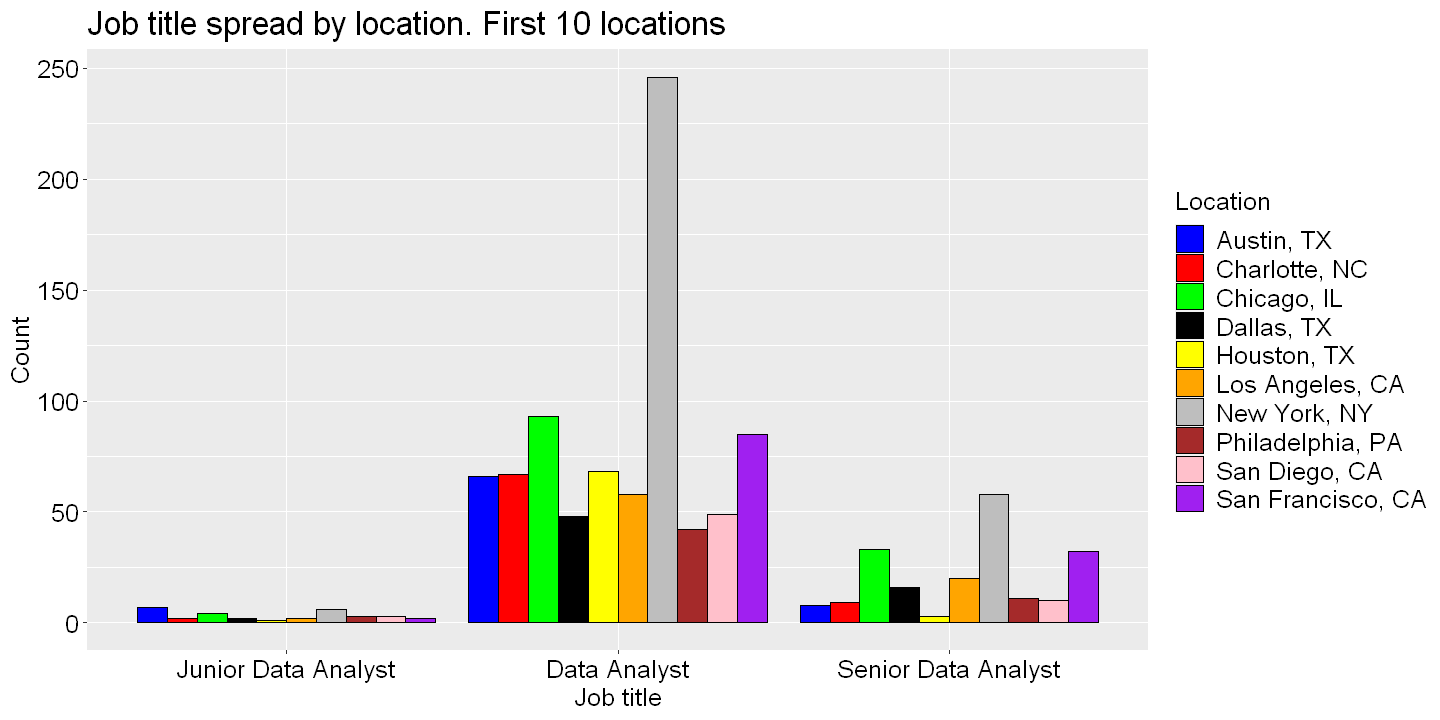

In [45]:
ggplot(data = top10.locations, aes(x = Job.Title, fill = Location)) +
  geom_bar(color = "black", position = position_dodge()) +
  scale_fill_manual(values=c("blue", "red", "green", "black", "yellow", "orange", 
                             "grey", "brown", "pink", "purple"))+
  theme(axis.title.x = element_text(colour = 'black', size = 15),
        axis.title.y = element_text(colour = 'black', size = 15),
        axis.text.x = element_text(colour='black', size = 15),
        axis.text.y = element_text(colour = 'black', size = 15),
        legend.title = element_text(colour = 'black', size = 15),
        legend.text = element_text(colour = 'black', size = 15),
        plot.title = element_text(colour = 'black', size = 20) )+
  xlab("Job title") +
  ylab("Count")+
  ggtitle("Job title spread by location. First 10 locations")

Let's get a deeper look of the estimate salary for juniors spread by location

In [42]:
junior.set <- subset(data.analyst.job, Job.Title == "Junior Data Analyst" & (Location == "New York, NY" |
                              Location == "Chicago, IL" |
                              Location == "San Francisco, CA" |
                              Location == "Austin, TX"|
                               Location == "Los Angeles, CA"| 
                                Location == "Charlotte, NC"|
                                Location == "Houston, TX" |
                                Location == "Dallas, TX" |
                                Location == "San Diego, CA"|
                                Location == "Philadelphia, PA"))

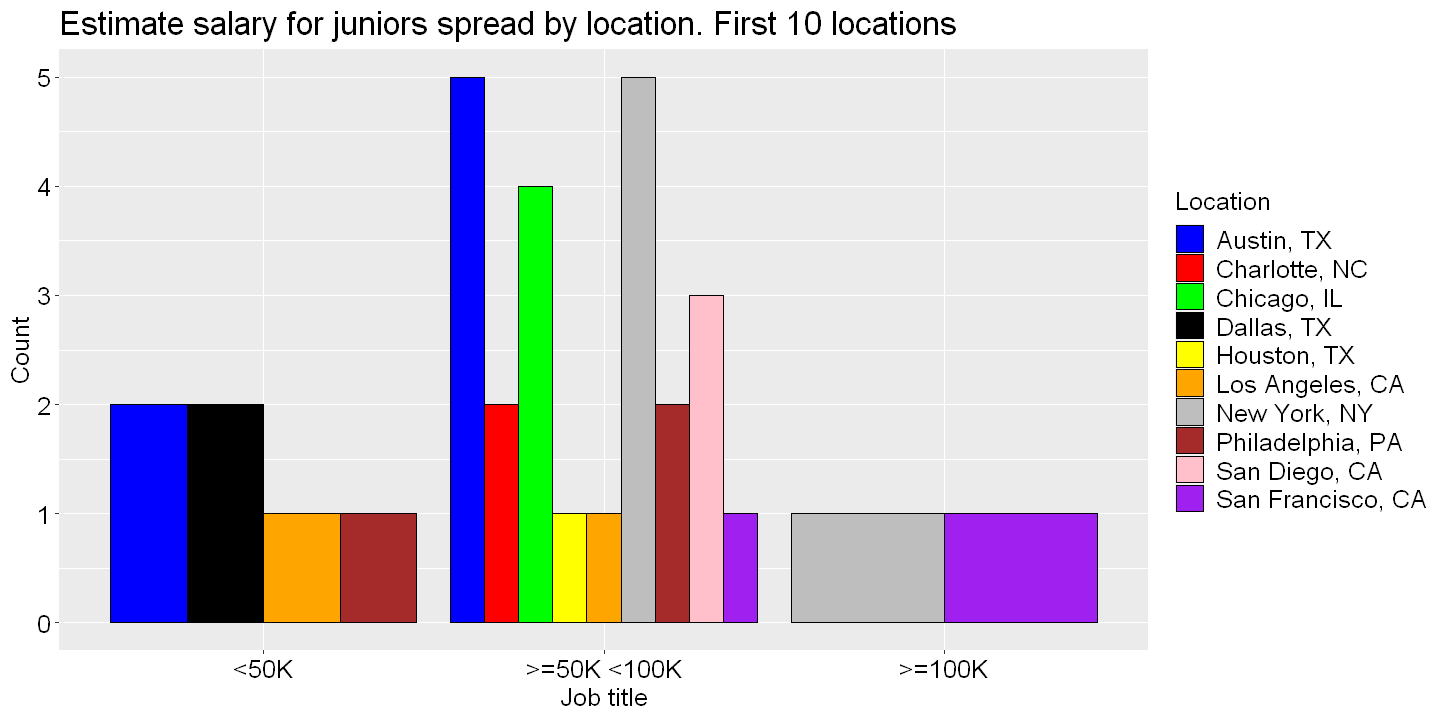

In [43]:
ggplot(data = junior.set, aes(x = Salary.Estimate, fill = Location)) +
  geom_bar(color = "black", position = position_dodge()) +
 scale_fill_manual(values= c("blue", "red", "green", "black", "yellow", "orange", 
                             "grey", "brown", "pink", "purple"))+
  theme(axis.title.x = element_text(colour = 'black', size = 15),
        axis.title.y = element_text(colour = 'black', size = 15),
        axis.text.x = element_text(colour='black', size = 15),
        axis.text.y = element_text(colour = 'black', size = 15),
        legend.title = element_text(colour = 'black', size = 15),
        legend.text = element_text(colour = 'black', size = 15),
        plot.title = element_text(colour = 'black', size = 20) )+
  xlab("Job title") +
  ylab("Count")+
  ggtitle("Estimate salary for juniors spread by location. First 10 locations")

## Q2 Conclusion

It seens we have found our heaven - the largest number of listings which promise a salary higher than 100K per year is New York and it's also the leading location in total number of job offers. San Francisco does not look like a very heavenly place because the sheer number of job offers is smaller than that in New York, while Chicago comes in third place in "Higher than 100K per year" level and is second to New York in 50K/100K level. 
For junior positions there are only two places where you can expect more than 100K per year -  New York or San Francisco. 
But if you would like to aim at a more realistic target salary, then New York, Austin or Chicago are the places for you.

## Q3 How salary varies in relation to sectors
After we have narrowed down the places for our heaven, similarly to Q2, we are going to look at how salary varies in relation to the top 10 sectors with the greatest number of listings.

In [46]:
summary(data.analyst.job$Sector)

-1                 Accounting & Legal 
                               353                                 43 
               Aerospace & Defense   Arts, Entertainment & Recreation 
                                22                                  7 
         Biotech & Pharmaceuticals                  Business Services 
                                33                                524 
Construction, Repair & Maintenance                  Consumer Services 
                                16                                 14 
                         Education                            Finance 
                                52                                169 
                        Government                        Health Care 
                                36                                151 
            Information Technology                          Insurance 
                               570                                 51 
                     Manufacturing                              Media 
                                40                                 42 
                   Mining & Metals                         Non-Profit 
                                 1                                 26 
      Oil, Gas, Energy & Utilities                        Real Estate 
                                13                                 12 
 Restaurants, Bars & Food Services                             Retail 
                                 8                                 38 
                Telecommunications         Transportation & Logistics 
                                11                                 20 
                  Travel & Tourism 
                                 1

In [47]:
# The results are unsorted and we have a lot of uncoded NAs with "-1" mark, we can visualise the results better.
# Recoding NAs
data.analyst.job$Sector <- as.character(data.analyst.job$Sector)
data.analyst.job$Sector[data.analyst.job$Sector == "-1"] <- NA
data.analyst.job$Sector <- as.factor(data.analyst.job$Sector)
sort(summary(data.analyst.job$Sector), decreasing = T)

Information Technology                  Business Services 
                               570                                524 
                              NA's                            Finance 
                               353                                169 
                       Health Care                          Education 
                               151                                 52 
                         Insurance                 Accounting & Legal 
                                51                                 43 
                             Media                      Manufacturing 
                                42                                 40 
                            Retail                         Government 
                                38                                 36 
         Biotech & Pharmaceuticals                         Non-Profit 
                                33                                 26 
               Aerospace & Defense         Transportation & Logistics 
                                22                                 20 
Construction, Repair & Maintenance                  Consumer Services 
                                16                                 14 
      Oil, Gas, Energy & Utilities                        Real Estate 
                                13                                 12 
                Telecommunications  Restaurants, Bars & Food Services 
                                11                                  8 
  Arts, Entertainment & Recreation                    Mining & Metals 
                                 7                                  1 
                  Travel & Tourism 
                                 1

In [48]:
# Top 10 sectors with the largest amount of listings
top10.sectors <- subset(data.analyst.job, (Sector == "Information Technology" |
                              Sector == "Business Services" |
                              Sector == "Finance" |
                              Sector == "Health Care"|
                                Sector == "Education"| 
                                Sector == "Insurance"|
                                Sector == "Accounting & Legal" |
                                Sector == "Media" |
                                Sector == "Manufacturing"|
                                Sector == "Retail")  & (Location == "New York, NY" |
                                    Location == "Chicago, IL" |
                                    Location == "San Francisco, CA" |
                                    Location == "Austin, TX"|
                                    Location == "Los Angeles, CA"| 
                                    Location == "Charlotte, NC"|
                                    Location == "Houston, TX" |
                                    Location == "Dallas, TX" |
                                    Location == "San Diego, CA"|
                                    Location == "Philadelphia, PA")) 

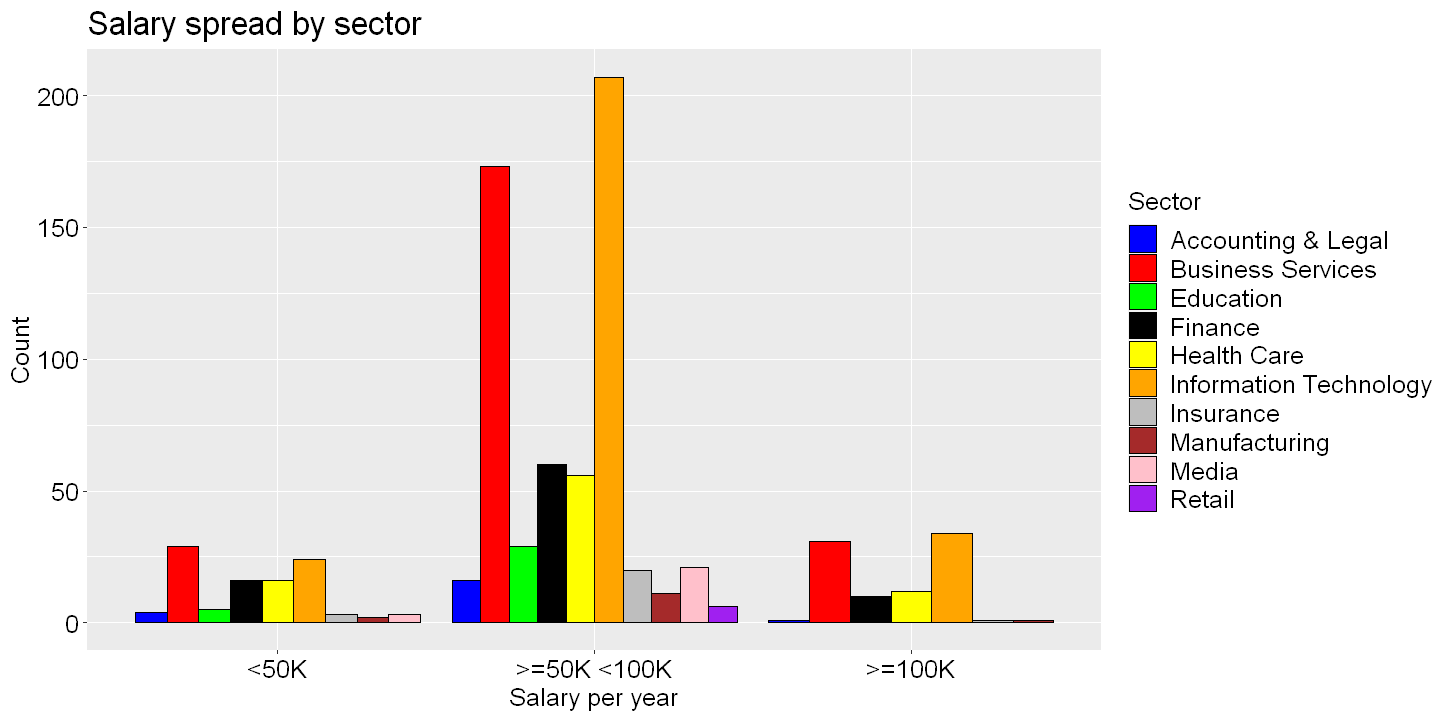

In [49]:
ggplot(data = top10.sectors, aes(x = Salary.Estimate, fill = Sector)) +
  geom_bar(color = "black", position = position_dodge()) +
  scale_fill_manual(values = c("blue", "red", "green", "black", "yellow", "orange", 
                             "grey", "brown", "pink", "purple"))+
  theme(axis.title.x = element_text(colour = 'black', size = 15),
        axis.title.y = element_text(colour = 'black', size = 15),
        axis.text.x = element_text(colour = 'black', size = 15),
        axis.text.y = element_text(colour = 'black', size = 15),
        legend.title = element_text(colour = 'black', size = 15),
        legend.text = element_text(colour = 'black', size = 15),
        plot.title = element_text(colour = 'black', size = 20) )+
  xlab("Salary per year") +
  ylab("Count")+
  ggtitle("Salary spread by sector")

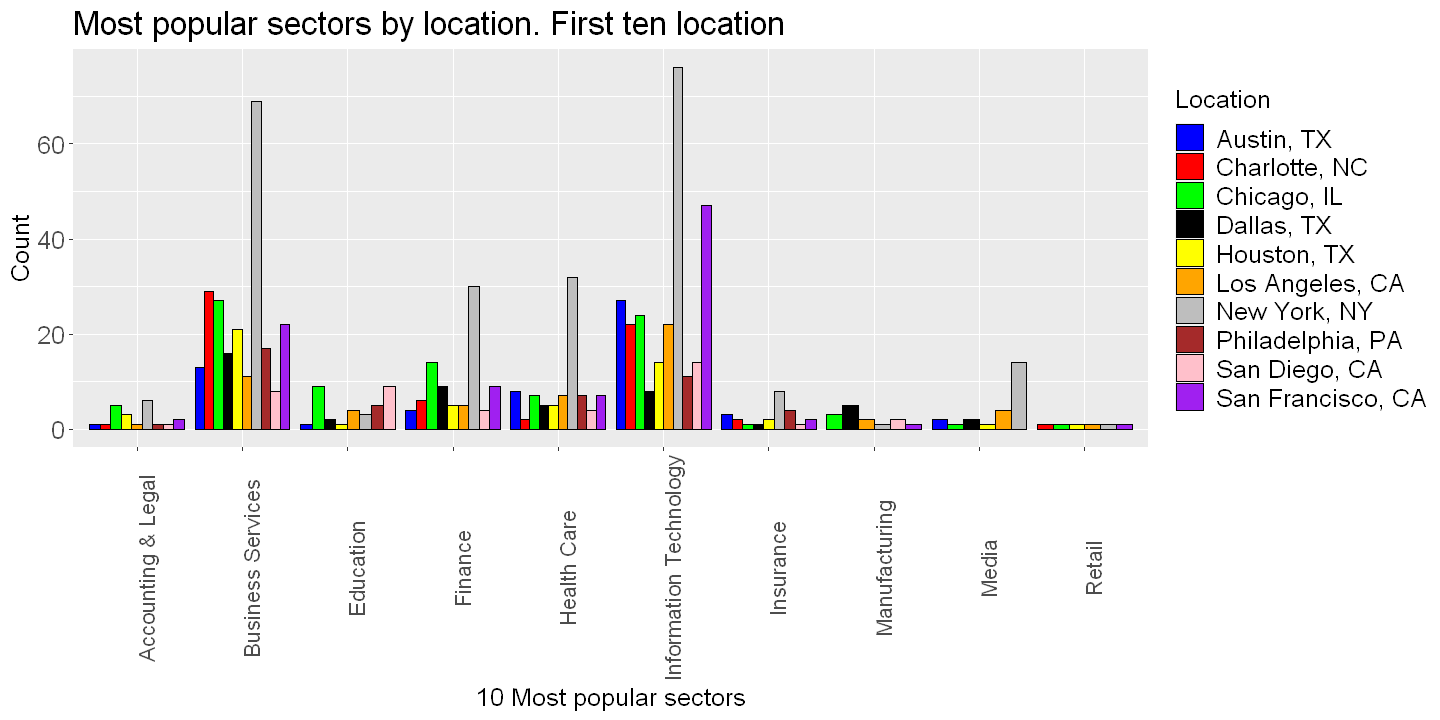

In [56]:
# We can visualise the number of listings in the 10 leading sectors in all 10 leading locations
ggplot(data = top10.sectors, aes(x= Sector, fill = Location)) +
  geom_bar(color = "black", position = position_dodge()) +
  scale_fill_manual(values= c("blue", "red", "green", "black", "yellow", "orange", 
                              "grey", "brown", "pink", "purple"))+
  theme(axis.title.x = element_text(colour = 'black', size = 15),
        axis.title.y = element_text(colour = 'black', size = 15),
        axis.text.x = element_text(size = 13, angle = 90),
        axis.text.y = element_text(size = 15),
        legend.title = element_text(colour = 'black', size = 15),
        legend.text = element_text(colour = 'black', size = 15),
        plot.title = element_text(colour = 'black', size = 20))+
  xlab("10 Most popular sectors") +
  ylab("Count")+
  ggtitle("Most popular sectors by location. First ten location")
options(repr.plot.width=12, repr.plot.height=6)

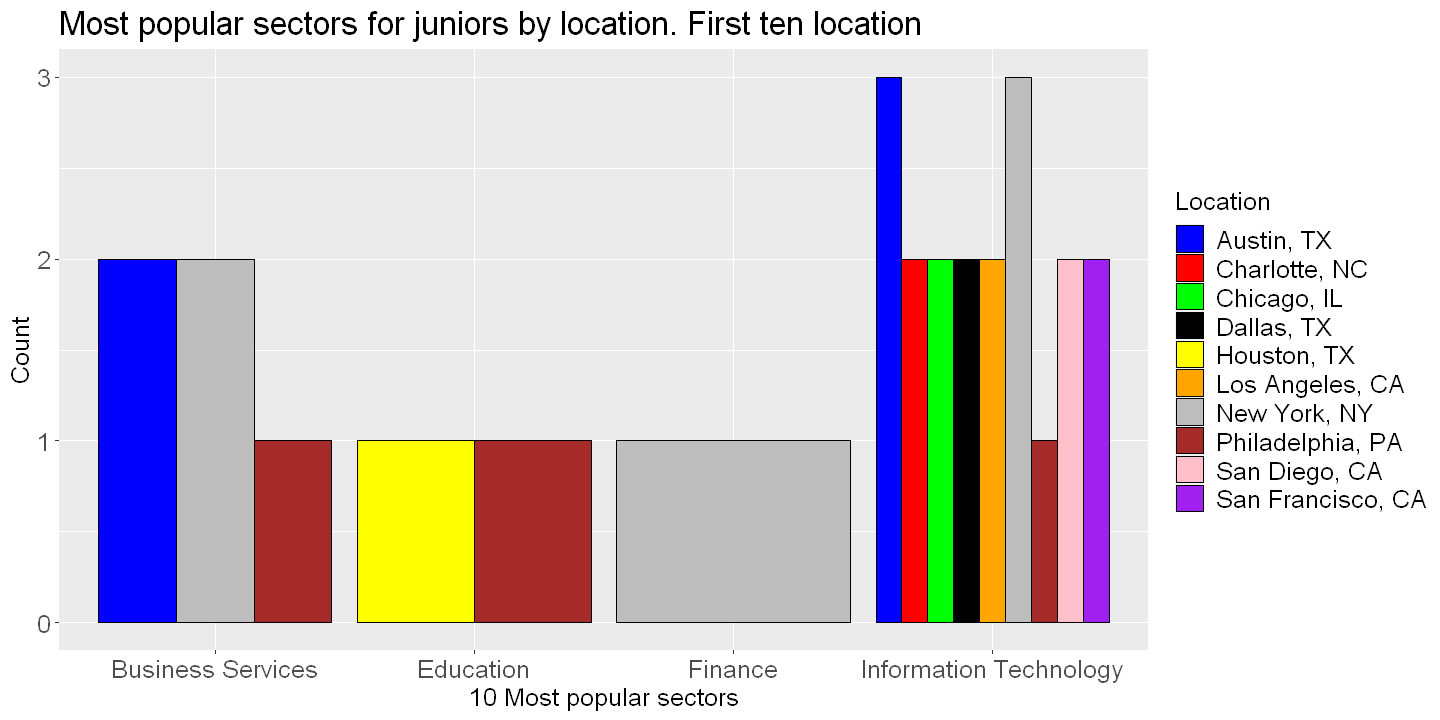

In [57]:
ggplot(data = subset(junior.set, Sector == "Information Technology" |
                              Sector == "Business Services" |
                              Sector == "Finance" |
                              Sector == "Health Care"|
                                Sector == "Education"| 
                                Sector == "Insurance"|
                                Sector == "Accounting & Legal" |
                                Sector == "Media" |
                                Sector == "Manufacturing"|
                                Sector == "Retail"), 
       aes(x= Sector, fill = Location)) +
  geom_bar(color = "black", position = position_dodge()) +
  scale_fill_manual(values= c("blue", "red", "green", "black", "yellow", "orange", 
                              "grey", "brown", "pink", "purple"))+
  theme(axis.title.x = element_text(colour = 'black', size = 15),
        axis.title.y = element_text(colour = 'black', size = 15),
        axis.text.x = element_text(size = 15),
        axis.text.y = element_text(size = 15),
        legend.title = element_text(colour = 'black', size = 15),
        legend.text = element_text(colour = 'black', size = 15),
        plot.title = element_text(colour = 'black', size = 20))+
  xlab("10 Most popular sectors") +
  ylab("Count")+
  ggtitle("Most popular sectors for juniors by location. First ten location")

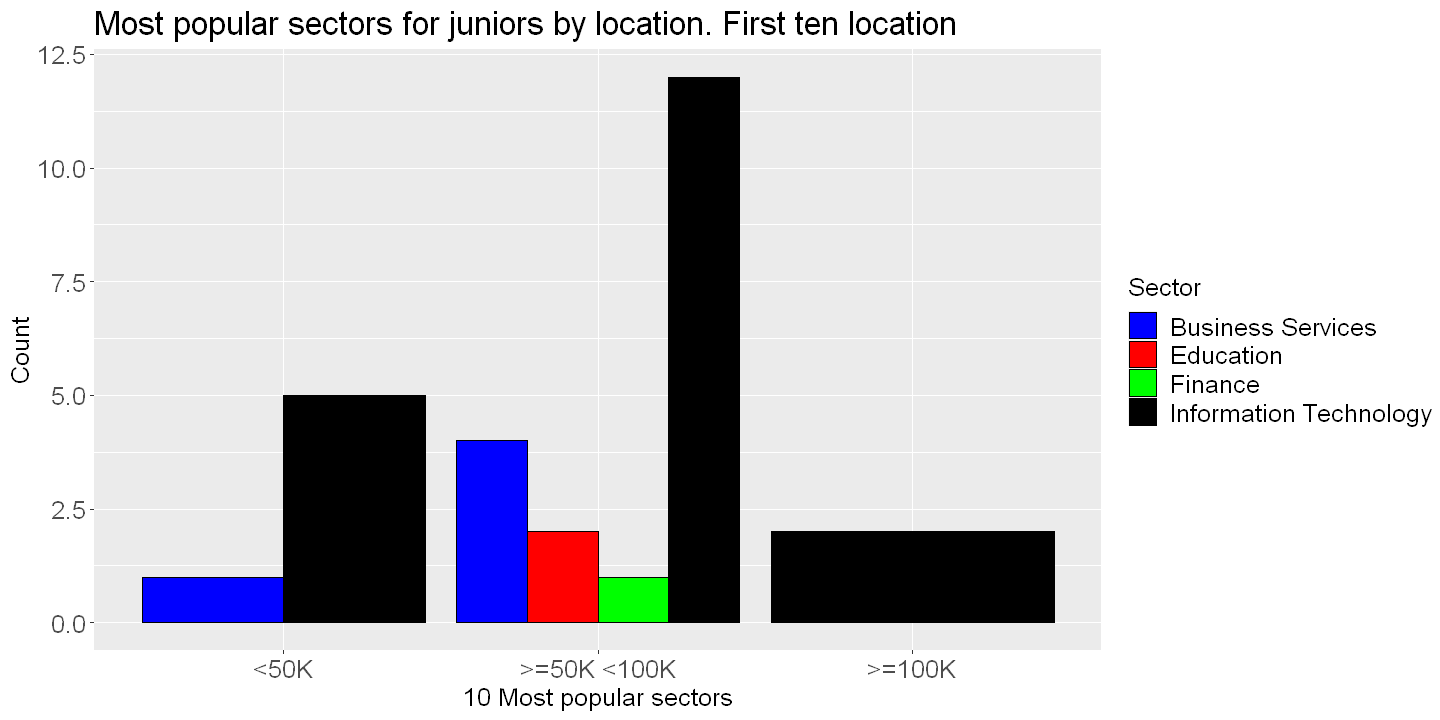

In [58]:
ggplot(data = subset(junior.set, Sector == "Information Technology" |
                              Sector == "Business Services" |
                              Sector == "Finance" |
                              Sector == "Health Care"|
                                Sector == "Education"| 
                                Sector == "Insurance"|
                                Sector == "Accounting & Legal" |
                                Sector == "Media" |
                                Sector == "Manufacturing"|
                                Sector == "Retail"), 
       aes(x= Salary.Estimate, fill = Sector)) +
  geom_bar(color = "black", position = position_dodge()) +
  scale_fill_manual(values= c("blue", "red", "green", "black", "yellow", "orange", 
                              "grey", "brown", "pink", "purple"))+
  theme(axis.title.x = element_text(colour = 'black', size = 15),
        axis.title.y = element_text(colour = 'black', size = 15),
        axis.text.x = element_text(size = 15),
        axis.text.y = element_text(size = 15),
        legend.title = element_text(colour = 'black', size = 15),
        legend.text = element_text(colour = 'black', size = 15),
        plot.title = element_text(colour = 'black', size = 20))+
  xlab("10 Most popular sectors") +
  ylab("Count")+
  ggtitle("Most popular sectors for juniors by location. First ten location")

## Q3 Conclusion

We have established that the best paid sectors are "Information Technology", "Business Services" and "Health Care". The majority of the job offers are in "Information Technology", "Business Services" and "Finance" sectors. 
For juniors the pucture does not look the same, a better choice would be "Information Technology" in New York or Austin. Also our choice can be "Business Services" but the amount of offers is significantly smaller.

## Q4 Which words describe the data analyst job?
Well done! Now that we know where our heaven could be, let's see what knowledge we would need to possess and what abilities will be required.

In [59]:
# In order to advance to the next stage of our analysis, we need to trasform all job descriptions into an appropriate format by 
# eleminating the stopwords, numbers and spaces. 
# After that we lemmatize all the words and calculate how many times they are repeated in the text.
corp <- Corpus(VectorSource(data.analyst.job$Job.Description))
corp <- tm_map(corp, content_transformer(tolower))
corp <- tm_map(corp, removeNumbers)
corp <- tm_map(corp, removePunctuation)
corp <- tm_map(corp, stripWhitespace)
corp <- tm_map(corp, removeWords, stopwords("english"))
corp <- tm_map(corp, lemmatize_strings)

Warning message in tm_map.SimpleCorpus(corp, content_transformer(tolower)):
"transformation drops documents"Warning message in tm_map.SimpleCorpus(corp, removeNumbers):
"transformation drops documents"Warning message in tm_map.SimpleCorpus(corp, removePunctuation):
"transformation drops documents"Warning message in tm_map.SimpleCorpus(corp, stripWhitespace):
"transformation drops documents"Warning message in tm_map.SimpleCorpus(corp, removeWords, stopwords("english")):
"transformation drops documents"Warning message in tm_map.SimpleCorpus(corp, lemmatize_strings):
"transformation drops documents"

In [60]:
# Transforming to the sorted matrix
job.describing.words <- TermDocumentMatrix(corp)
job.describing.words <- as.matrix(job.describing.words)
job.describing.words <- sort(rowSums(job.describing.words), decreasing = TRUE)
head(job.describing.words, 100)

datum     experience           work       business         report 
         23240           9774           7855           7108           5267 
          team          skill           will       analysis        analyst 
          4997           4810           4598           4379           3852 
       ability     management           year        support        process 
          3693           3608           3463           3379           3330 
        system        include            use        provide        require 
          3243           3223           3171           3074           3072 
           вђў        project    requirement            job    information 
          2873           2805           2752           2744           2712 
     knowledge        develop         strong           good    opportunity 
          2677           2638           2606           2536           2425 
     analytics           tool           need            sql        quality 
          2417           2398           2298           2248           2243 
    understand        service       solution    development        program 
          2212           2172           2168           2120           2042 
       analyze        product         client            new     technology 
          2016           1998           1995           1984           1976 
      database      technical       analytic        company         relate 
          1952           1927           1909           1908           1888 
        design       position       customer         degree         prefer 
          1844           1826           1819           1809           1756 
         model          build         create        perform           role 
          1734           1726           1723           1692           1674 
         write    environment       identify    application responsibility 
          1641           1609           1601           1587           1526 
          must  communication         ensure           help           make 
          1524           1512           1488           1479           1468 
      maintain        science         health         status        complex 
          1446           1433           1432           1395           1378 
      research         manage           test        insight           plan 
          1376           1354           1343           1341           1316 
        across         market      financial       engineer        problem 
          1306           1306           1303           1271           1265 
         drive    statistical          andor          level         source 
          1263           1243           1206           1204           1201 
       partner    performance          excel       software           time 
          1190           1187           1179           1177           1148 
          lead            etc       employee  qualification   organization 
          1129           1127           1124           1115           1111

We can observe that the "datum" repeats 23240 times and that can be expected from a job description in the data analysis field. Most of the words do not contain any meaningful information so we have chosen 31 words from the top 100 that represent the skills and abilities that a data analyst must possess. 

In [61]:
data.analyst.description.words <- job.describing.words[c("report", "analysis", "management", "support", "system",
      "project", "information", "develop", "analytics", "sql", "quality", "solution", "product", "technology",
      "database", "analytic", "model", "build", "create", "design", "customer", "environment", "identify", 
      "communication", "science", "research", "test", "insight", "statistical", "excel", "software")]

In [62]:
data.analyst.description.words <- sort(data.analyst.description.words, decreasing = T)

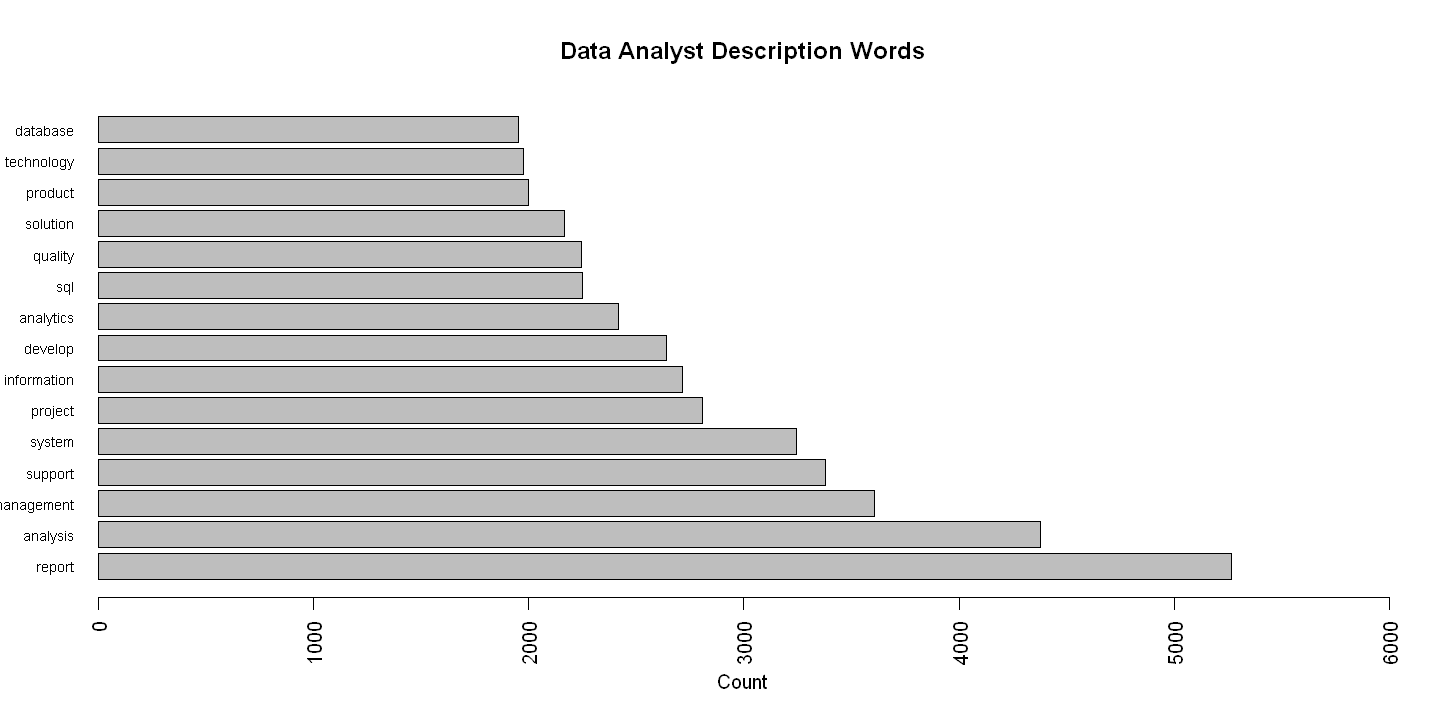

In [67]:
par(las=2)
barplot(data.analyst.description.words[1:15], space = 0.2, horiz = T, beside = T, col = "grey",
        main = "Data Analyst Description Words", xlab = "Count", cex.names=0.7, xlim = range(0,6000))

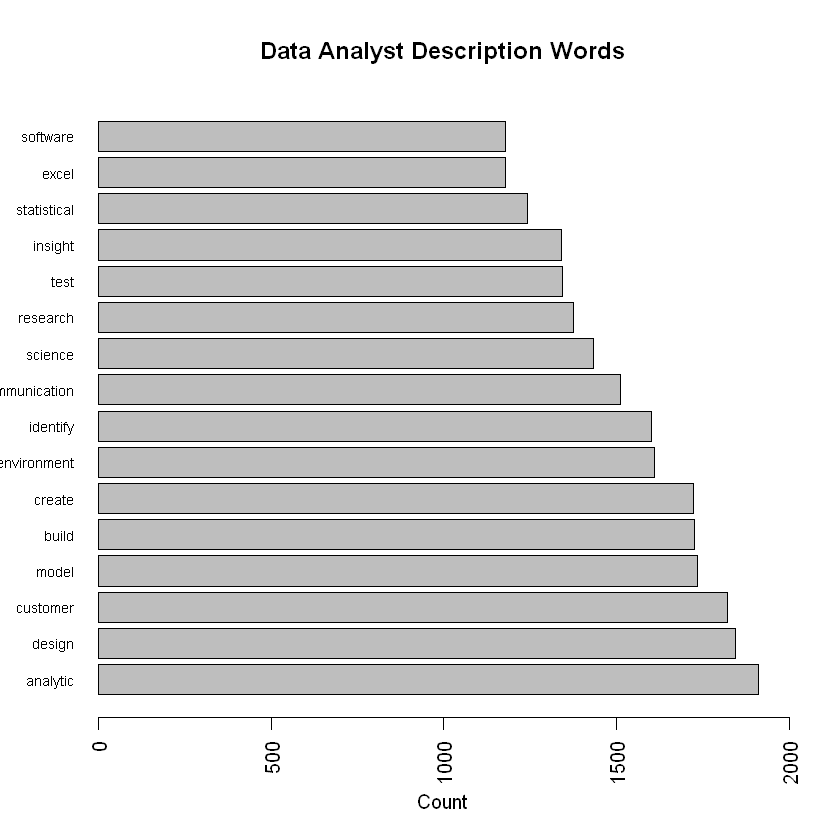

In [80]:
par(las=2)
barplot(data.analyst.description.words[16:31], space = 0.2, horiz = T, beside = T, main = "Data Analyst Description Words",
        xlab = "Count", cex.names=0.7, xlim = range(0, 2000))

Something funny has happened - where have our favourite languages "Python" and "R" gone?

In [68]:
job.describing.words["python"]

python 
   760

In [69]:
job.describing.words["r"]

<NA> 
  NA

The lemmatization process deleted the "r" because it's not a word, for that reason we need to use regexp again. 

In [70]:
length(grep("R", data.analyst.job$Job.Description))

[1] 2107

We cannot be sure whether "R" is the label of programming language or just a part of a simple word, but with the same method we can see how many times "Python" had been written.

In [71]:
length(grep("[Pp][Yy][Tt][Hh][Oo][Nn]", data.analyst.job$Job.Description)) 

[1] 637

For some reason the number of "Python" repeatitions is smaller than the number of "Python" repetitions after lemmatization.  We cannot say with certainty which of the two languages is more desirable, but I think that the difference in numbers between the two is one to keep in mind.     

## Q4 Conclusion
So far, we've shortlisted the 31 most frequently used words and we can now try to provide an accurate description of a data analyst: 

They work with data and report information based on the analysis they conduct. They develop, model and create project designs, mostly in relation to databases, using technologies, analytics and various other skills. The data analyst needs to possess knowledge in statistics and statistical tests, the "science method" and SQL with excel. This is the employee tasked with the responsibility of communicating research insight and identifying the best business solutions to support the management team with. 

## General Conclusion
We've observed the salary for each of tree job titles, we have establised what is the average salary estimate within the 10 leading locations for any data analyst and the number of job offers related to every position. Consequently, we ploted the graphs which show the various salaries in relation to the top 10 sectors and the amount of listings in said sectors by the 10 leading locations. We've managed to present a hypothetical job description using the most frequently used words that desribe the skills and abilities that a data analyst must possess. 

In general, if you want to start your career in one of the places presented in the dataset, with the biggest salary potential, you need to head to New York or San Francisco, but keep in mind that you would probably earn between 50K and 100K per year. For people that don't want to fight for an offer with more than 100K per year you can choose go to New York, Austin or Chicago. If you want to get a job in the easiest way then you should prioritise the "Information Technology" and "Business Services" sectors.

For regular data analysts the recommendations are absolutely the same, for those with big ambitions the places are New York and San Francisco, you can anticipate a salary between 50K and 100K and the sectors with the biggest amount of listings are "Information Technology" and "Business Services".

Of course we cannot say for certain if the dataset which I found is appropriate because it doesn't present locations from all over world, and after all, not everyone can moved to America, we can always find a better way to tidy up the dataset etc. I understand that the idea of the project is to show my abilities with R and to work with datasets, but there is something I want to say "Heaven is where you build it".

# References
The dataset was downloaded from [kaggle.com/andrewmvd/data-analyst-jobs](https://www.kaggle.com/andrewmvd/data-analyst-jobs)